In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Sasha\\Desktop\\Py\\Git\\PracticeModels\\DataAnalysis\\repl2.csv", index_col='date',parse_dates=['date'])

In [59]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

<AxesSubplot:xlabel='date'>

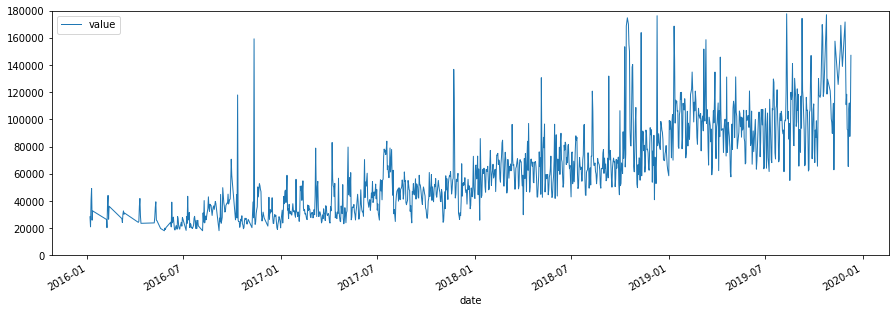

In [64]:
df.plot(ylim=(0,180000),kind='line', figsize=(15,5), y='value', linewidth=1)

In [67]:
df['year'] = df.index.year
df['month'] = df.index.month
df.head()

,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5


In [69]:
df_bar = df.groupby(['year','month'])['value']

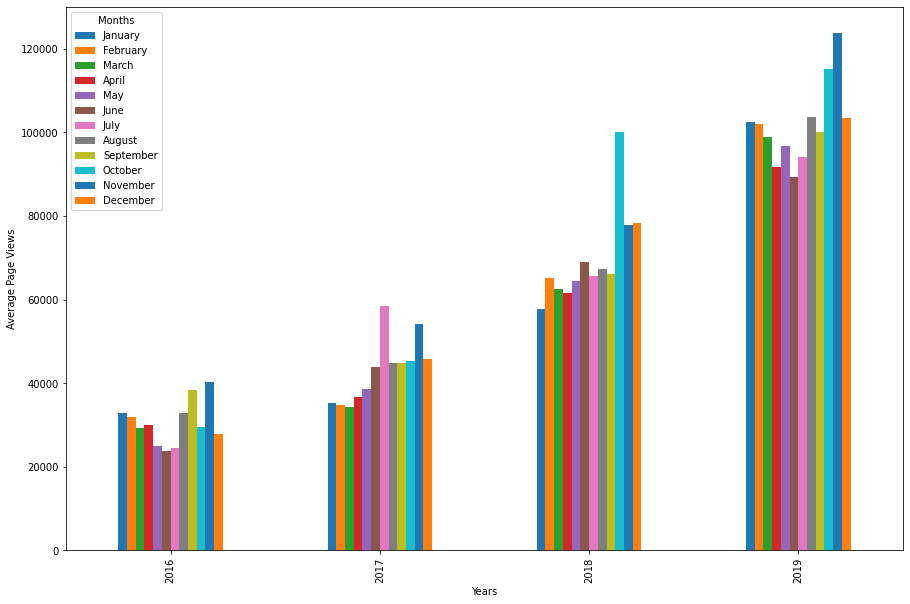

In [71]:
df_bar = df.copy()
df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()

# Draw bar plot
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
#plt.xticks(rotation=30)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

Text(0, 0.5, 'Page Views')

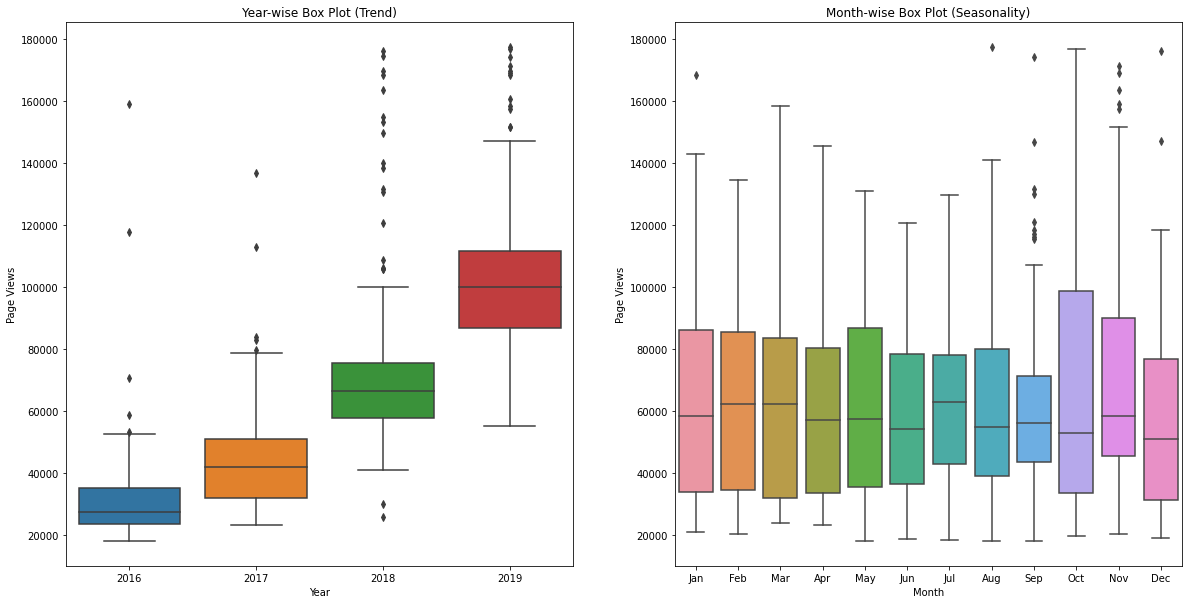

In [72]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")

# Draw box plots (using Seaborn)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)") 
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')